Akhmad Ridlo Rifa'i
1227050013
Praktikum Pembelajaran Mesin B

**Persiapan Data**
---
Setiap proyek machine learning dimulai dengan mempersiapkan "kotak perkakas" kita. Di Google Colab, ini berarti mengimpor pustaka-pustaka Python yang akan kita gunakan. Setiap pustaka memiliki peran spesifik:

- pandas: Ini adalah fondasi untuk semua manipulasi data. Pustaka ini memungkinkan kita untuk memuat data dari file (seperti CSV) ke dalam sebuah struktur yang disebut DataFrame. Anggap saja DataFrame sebagai sebuah tabel atau spreadsheet yang sangat canggih di dalam Python, yang memudahkan kita untuk melihat, membersihkan, dan mengubah data.

- numpy: Merupakan mesin untuk komputasi numerik di Python. Banyak pustaka lain, termasuk pandas dan scikit-learn, dibangun di atasnya. Kita menggunakannya untuk operasi matematika yang efisien pada array data yang besar.

- matplotlib & seaborn: Ini adalah duo untuk visualisasi data. matplotlib adalah pustaka dasar untuk membuat grafik, sedangkan seaborn dibangun di atasnya untuk menghasilkan visualisasi statistik yang lebih indah dan informatif dengan kode yang lebih sederhana. Visualisasi sangat penting untuk memahami pola dalam data sebelum kita membangun model.

- scikit-learn: Ini adalah "pisau tentara Swiss" untuk machine learning di Python. Dari sini, kita mengimpor modul-modul spesifik:

- train_test_split: Fungsi vital untuk membagi dataset kita menjadi dua bagian: satu untuk melatih model, dan satu lagi untuk mengujinya. Ini adalah praktik fundamental untuk evaluasi model yang jujur.

- StandardScaler: Alat untuk melakukan penskalaan fitur. Ini akan kita bahas lebih detail karena sangat krusial untuk KNN.

- KNeighborsClassifier: Ini adalah implementasi dari algoritma K-Nearest Neighbors itu sendiri, yang khusus dirancang untuk tugas klasifikasi.

- metrics: Kumpulan fungsi untuk "menilai" atau "mengukur" seberapa baik performa model kita, seperti akurasi, confusion matrix, dan lainnya.

In [ ]:
# Impor pustaka-pustaka dasar untuk data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Impor alat-alat dari Scikit-learn untuk pemodelan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**Pemanggilan Dataset**
---
Sebelum kita bisa membangun model, kita harus "berkenalan" dengan data kita. Proses ini disebut Exploratory Data Analysis (EDA).

Memuat Data: Kita memuat dataset Pima Indians Diabetes dari sebuah URL. File CSV ini tidak memiliki baris header (nama kolom), jadi kita perlu menyediakannya secara manual melalui parameter names.

1. Eksplorasi Awal:

 - df.head(): Memberikan kita "pandangan pertama" pada lima baris data teratas. Ini berguna untuk memastikan data dimuat dengan benar dan memahami formatnya.

 - f.info(): Ini adalah "pemeriksaan teknis". Fungsi ini memberikan ringkasan DataFrame, termasuk jumlah entri, nama setiap kolom, jumlah nilai non-null, dan tipe data (Dtype) setiap kolom. Dari sini kita bisa mendeteksi adanya data yang hilang (missing values) atau tipe data yang salah.

 - df['Outcome'].value_counts(): Ini sangat penting untuk tugas klasifikasi. Kita memeriksa keseimbangan kelas—yaitu, berapa banyak sampel untuk setiap kategori output (0 untuk non-diabetes dan 1 untuk diabetes). Jika salah satu kelas jauh lebih dominan, ini dapat memengaruhi cara kita mengevaluasi model. Dalam kasus ini, data tidak seimbang secara sempurna, tetapi masih cukup wajar.

In [ ]:
# URL ke dataset Pima Indians Diabetes
url = "sample_data/diabetes.csv"

column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'Outcome']
# Memuat data, melewati baris header dan memberikan nama kolom secara manual
df = pd.read_csv(url, header=1, names=column_names)

# Tampilkan informasi dasar untuk memahami struktur dan tipe data
print("Informasi Dataset:")
df.info()

print("\nDistribusi Kelas Target (Outcome):")
print(df['Outcome'].value_counts())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   preg     767 non-null    int64  
 1   plas     767 non-null    int64  
 2   pres     767 non-null    int64  
 3   skin     767 non-null    int64  
 4   test     767 non-null    int64  
 5   mass     767 non-null    float64
 6   pedi     767 non-null    float64
 7   age      767 non-null    int64  
 8   Outcome  767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Distribusi Kelas Target (Outcome):
Outcome
0    500
1    267
Name: count, dtype: int64


**Pra-pemrosesan Data**
---
Data mentah jarang sekali bisa langsung digunakan untuk pemodelan. Kita perlu membersihkan dan mempersiapkannya.

- Memisahkan Fitur (X) dan Target (y): Kita memisahkan DataFrame menjadi dua bagian. X berisi semua kolom yang akan kita gunakan sebagai "bukti" atau "prediktor" (misalnya, kadar glukosa, tekanan darah). y berisi kolom Outcome, yang merupakan "jawaban" atau "label" yang ingin kita prediksi.

- Membagi Data Latih dan Uji: Ini adalah aturan emas dalam machine learning. Kita membagi data kita menjadi training set (biasanya 80%) dan testing set (20%). Model akan "belajar" hanya dari training set. Testing set disimpan terpisah sebagai data "baru" yang belum pernah dilihat model, yang akan kita gunakan untuk "ujian akhir" guna mengukur seberapa baik performanya di dunia nyata. Parameter stratify=y memastikan bahwa rasio penderita diabetes dan non-diabetes di set pelatihan dan pengujian sama dengan rasio di dataset asli.

- Penskalaan Fitur: Ini adalah langkah paling kritikal untuk algoritma berbasis jarak seperti KNN. KNN mengklasifikasikan titik data baru dengan melihat jaraknya ke tetangga terdekat. Bayangkan fitur plas (kadar glukosa) yang nilainya bisa mencapai 200, dan fitur preg (jumlah kehamilan) yang nilainya mungkin di bawah 10. Tanpa penskalaan, jarak akan sepenuhnya didominasi oleh plas, dan kontribusi dari preg akan hampir diabaikan. StandardScaler mengatasi ini dengan mentransformasi setiap fitur sehingga memiliki rata-rata 0 dan standar deviasi 1. Ini menempatkan semua fitur pada "pijakan yang sama".

Penting: Kita menggunakan .fit_transform() pada X_train untuk "mempelajari" parameter skala (rata-rata dan standar deviasi) dan langsung menerapkannya. Kemudian, kita menggunakan .transform() saja pada X_test untuk menerapkan parameter skala yang sama yang telah dipelajari dari data latih. Ini mencegah "kebocoran informasi" dari data uji ke dalam proses pelatihan.

In [ ]:
# Pisahkan fitur (X) dan target (y)
# Ambil semua kolom kecuali 'Outcome' sebagai fitur (X)
X = df.drop('Outcome', axis=1)
# Ambil kolom 'Outcome' sebagai target (y)
y = df['Outcome']

# Konversi semua kolom di X ke tipe data numerik, tangani nilai yang tidak valid dengan 'coerce' (mengubahnya menjadi NaN)
X = X.apply(pd.to_numeric, errors='coerce')

# Hapus baris dengan nilai NaN yang mungkin muncul setelah konversi
# Anda bisa memilih untuk menghapus baris (dropna) atau mengisi nilai yang hilang (fillna)
# Untuk saat ini, kita akan menghapus baris untuk menyederhanakan
df.dropna(inplace=True)

# Karena kita menghapus baris, pisahkan kembali X dan y dari df yang sudah dibersihkan
X = df.drop('Outcome', axis=1)
y = df['Outcome']


# Pastikan juga y adalah tipe data numerik
y = pd.to_numeric(y, errors='coerce')
df.dropna(inplace=True) # Hapus baris lagi setelah membersihkan y jika ada NaN

X = df.drop('Outcome', axis=1)
y = df['Outcome']


# Bagi data menjadi set pelatihan dan pengujian dengan stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Kode penskalaan fitur Anda setelah ini akan berjalan tanpa error
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Periksa jumlah sampel untuk setiap kelas di variabel y
print(y.value_counts())

Outcome
0    500
1    267
Name: count, dtype: int64


**Membangun dan Melatih Model KNN**
---
- Logika KNN: Algoritma ini sangat intuitif. Untuk mengklasifikasikan sebuah titik data baru, model akan mencari k titik data dari training set yang jaraknya paling dekat dengannya. Kemudian, ia akan melakukan "voting": kelas mayoritas di antara k tetangga terdekat itulah yang akan menjadi prediksi untuk titik data baru tersebut.

- Proses .fit(): Untuk KNN, proses "pelatihan" atau .fit() sangat sederhana. Tidak ada proses pembelajaran parameter yang rumit seperti pada regresi atau jaringan saraf. Pada dasarnya, model hanya menyimpan atau "mengingat" seluruh lokasi titik data di training set. Pekerjaan komputasi yang sesungguhnya terjadi pada saat prediksi.

- Memilih k: Nilai k adalah sebuah hyperparameter yang kita tentukan. k=5 adalah pilihan awal yang umum dan masuk akal.

In [ ]:
# Inisialisasi model KNN dengan k=5
knn = KNeighborsClassifier(n_neighbors=5)

# "Latih" model dengan menyimpan data latih yang telah diskalakan
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

**Evaluasi Performa Model**
---
Inilah saatnya kita menguji seberapa baik model kita. Kita menggunakan X_test_scaled (data uji) untuk membuat prediksi, lalu membandingkan hasil prediksi (y_pred) dengan jawaban yang sebenarnya (y_test).

- Akurasi: Metrik paling sederhana, yaitu persentase prediksi yang benar. Namun, bisa menyesatkan jika data tidak seimbang.

- Confusion Matrix: Ini adalah tabel yang memberikan rincian performa.

    - True Positive (TP): Prediksi: 1, Aktual: 1 (Benar mendeteksi diabetes).

    - True Negative (TN): Prediksi: 0, Aktual: 0 (Benar mendeteksi non-diabetes).

    - False Positive (FP): Prediksi: 1, Aktual: 0 (Salah diagnosis, Tipe I Error).

    - False Negative (FN): Prediksi: 0, Aktual: 1 (Gagal mendeteksi diabetes, Tipe II Error). Dalam konteks medis, ini adalah kesalahan yang paling berbahaya.

- Laporan Klasifikasi: Memberikan ringkasan metrik yang lebih kaya:

  - Precision: Dari semua yang diprediksi sebagai diabetes, berapa persen yang benar-benar diabetes? (Fokus pada keakuratan prediksi positif).

  - Recall (Sensitivity): Dari semua yang sebenarnya menderita diabetes, berapa persen yang berhasil dideteksi oleh model? (Fokus pada kelengkapan deteksi).

  - F1-Score: Rata-rata harmonik dari precision dan recall, memberikan satu skor yang menyeimbangkan keduanya.

In [ ]:
# Buat prediksi pada data uji
y_pred = knn.predict(X_test_scaled)

# Evaluasi akurasi
print(f"Akurasi Model: {accuracy_score(y_test, y_pred):.4f}")

# Tampilkan Laporan Klasifikasi untuk analisis mendalam
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi Model: 0.7078

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       100
           1       0.59      0.54      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154



**Menemukan Nilai K Optimal**
---
k=5 hanyalah titik awal. Untuk performa yang lebih baik, kita perlu mencari nilai k yang optimal secara sistematis. Proses ini disebut hyperparameter tuning.

- ogika: Kita akan mencoba berbagai nilai k (misalnya, dari 1 hingga 40) dan melihat bagaimana performa model untuk setiap nilai. Kita melatih model baru untuk setiap k, membuat prediksi pada data uji yang sama, lalu menghitung tingkat kesalahannya (error rate).

- Interpretasi Grafik: Grafik akan menunjukkan hubungan antara nilai k (kompleksitas model) dan error rate.

  - k terlalu kecil: Model menjadi terlalu sensitif terhadap noise dan data pencilan (outliers). Ini disebut overfitting. Error rate mungkin tinggi.

  - k terlalu besar: Model menjadi terlalu umum dan mengabaikan pola lokal. Ini disebut underfitting. Error rate mungkin akan naik kembali.

- Tujuan: Kita mencari nilai k yang berada di "dasar lembah" pada grafik, yaitu titik di mana error rate paling rendah. Nilai k inilah yang memberikan keseimbangan terbaik antara bias dan varians, dan kemungkinan besar akan memberikan performa terbaik pada data baru.

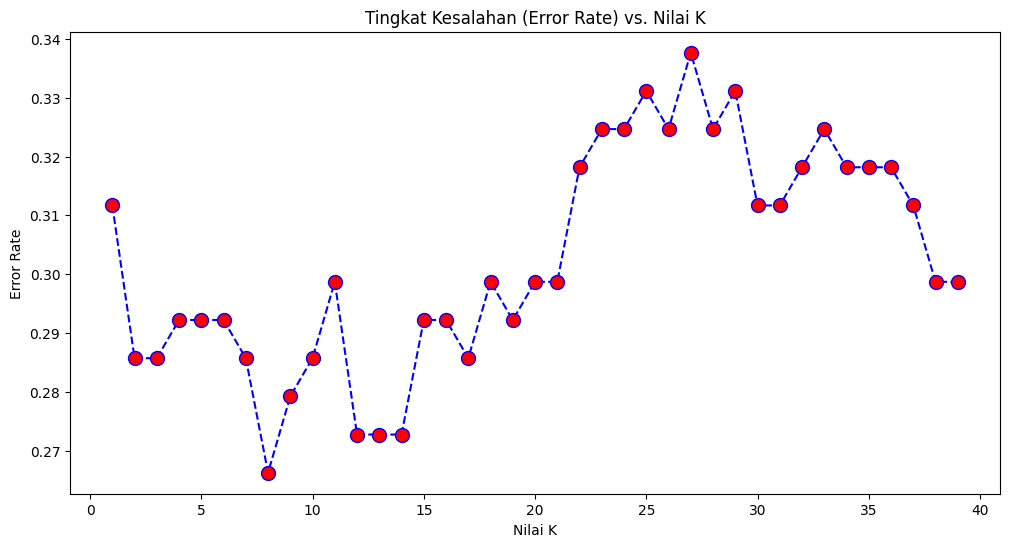

In [ ]:
error_rate = []

# Uji berbagai nilai k dari 1 sampai 40
for i in range(1, 40):
    knn_loop = KNeighborsClassifier(n_neighbors=i)
    knn_loop.fit(X_train_scaled, y_train)
    pred_i = knn_loop.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

# Plot hasilnya
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tingkat Kesalahan (Error Rate) vs. Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Error Rate')
plt.show()